In [5]:
from sklearn.datasets import fetch_openml

In [6]:
mnist = fetch_openml('mnist_784',version=1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
X,y = mnist["data"],mnist["target"]

In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
X.shape

(70000, 784)

In [14]:
some_digit = X.to_numpy()[0]

In [15]:
some_digit_image = some_digit.reshape(28,28)

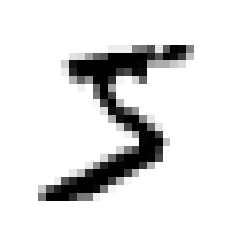

In [19]:
plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show()

In [20]:
y[0]

'5'

In [8]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [27]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [23]:
from sklearn.linear_model import SGDClassifier

In [25]:
sgd_clf = SGDClassifier(random_state=42)


In [28]:
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [29]:
sgd_clf.predict([some_digit])

array([ True])

In [31]:
from sklearn.model_selection import cross_val_score

In [33]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [34]:
from sklearn.model_selection import cross_val_predict

In [35]:
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [39]:
from sklearn.metrics import precision_score, recall_score

In [40]:
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [41]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [42]:
from sklearn.metrics import f1_score

In [43]:
f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [45]:
y_scores =cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [48]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

In [49]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds) :
    plt.plot(thresholds,precisions[:-1],"b--", label = "정밀도")
    plt.plot(thresholds,recalls[:-1],"g--", label = "재현율")

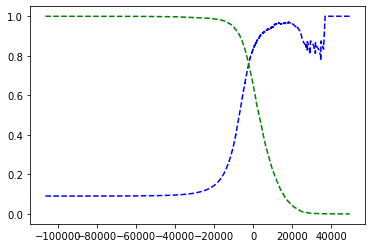

In [50]:
 plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [55]:
import numpy as np
threshold_90_precision = thresholds[np.argmax(precisions >=0.9 )]

In [56]:
y_train_pred_90 = (y_scores>=threshold_90_precision)

In [57]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [58]:
from sklearn.svm import SVC

In [59]:
svm_clf = SVC()

In [60]:
svm_clf.fit(X_train,y_train)

SVC()

In [61]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [62]:
some_digit_scores = svm_clf.decision_function([some_digit])

In [63]:
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

In [66]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))